In [1]:
import os
import numpy as np
import pandas as pd
import polars as pl

mmap_dir = r"C:\Users\musab\mmap_files_combined_01"

mmap_files = [file for file in os.listdir(mmap_dir) if file.endswith('.mmap')]

dfs = []
for mmap_file in mmap_files:
    file_path = os.path.join(mmap_dir, mmap_file)
    data = np.memmap(file_path, dtype=np.float32, mode='r')
    reshaped_data = data.reshape((-1, 21))
    df = pd.DataFrame(reshaped_data)
    dfs.append((mmap_file, df)) 

pl_dfs = []
for idx, (mmap_file, df) in enumerate(dfs):
    pl_df = pl.from_pandas(df)
    pl_dfs.append((mmap_file, pl_df))

for idx, (mmap_file, pl_df) in enumerate(pl_dfs):
    print(f"Polars DataFrame {idx + 1} - {mmap_file}:")
    print(pl_df)
    print()


Polars DataFrame 1 - combined.mmap:
shape: (232_716, 21)
┌───────────┬───────────┬─────────────┬─────────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ 0         ┆ 1         ┆ 2           ┆ 3           ┆ … ┆ 17       ┆ 18        ┆ 19        ┆ 20        │
│ ---       ┆ ---       ┆ ---         ┆ ---         ┆   ┆ ---      ┆ ---       ┆ ---       ┆ ---       │
│ f32       ┆ f32       ┆ f32         ┆ f32         ┆   ┆ f32      ┆ f32       ┆ f32       ┆ f32       │
╞═══════════╪═══════════╪═════════════╪═════════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ 4.10844   ┆ -0.343222 ┆ -2.4861e-12 ┆ 3.9683e-12  ┆ … ┆ 0.703096 ┆ -0.491253 ┆ 0.188706  ┆ 0.03957   │
│ 3.672904  ┆ -0.468682 ┆ -2.2579e-12 ┆ 3.2386e-12  ┆ … ┆ 0.913143 ┆ -0.429326 ┆ -0.074963 ┆ 0.300736  │
│ 4.002487  ┆ -1.789895 ┆ -1.5356e-12 ┆ -1.2418e-13 ┆ … ┆ 0.710369 ┆ 0.271375  ┆ -0.055633 ┆ -0.44803  │
│ 3.859261  ┆ -2.658597 ┆ -2.1234e-12 ┆ 2.1127e-12  ┆ … ┆ 0.839748 ┆ 0.098765  ┆ 0.17469   ┆ -0.491489 

In [2]:
from sklearn.model_selection import train_test_split
import gc

big_raw_train_df = pd.DataFrame()
big_raw_test_df = pd.DataFrame()

for idx, (mmap_file, df) in enumerate(dfs):
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    if 'File' in train_df.columns:
        train_df.drop(columns=['File'], inplace=True)
    if 'File' in test_df.columns:
        test_df.drop(columns=['File'], inplace=True)

    big_raw_train_df = pd.concat([big_raw_train_df, train_df])
    big_raw_test_df = pd.concat([big_raw_test_df, test_df])

    del train_df, test_df
    gc.collect()

big_raw_train_df.reset_index(drop=True, inplace=True)
big_raw_test_df.reset_index(drop=True, inplace=True)


In [3]:
big_raw_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,21.226191,-15.365073,20.849529,20.849529,20.849529,130.927460,1134.398560,14.281681,17.224615,2046.246948,...,-0.216157,0.003550,-0.035102,0.247342,1.076447,1.313684,0.529919,0.342383,-0.358137,0.222818
1,22.054707,-21.767044,19.575943,19.575943,19.575943,310.508362,1190.844727,14.981090,16.646305,2075.815430,...,0.044525,-0.229294,-0.062685,0.248142,1.170698,-0.082802,2.559077,-0.373044,0.342732,0.025965
2,19.689472,-7.347562,17.053434,17.053434,17.053434,146.527588,1153.607056,14.501738,17.014364,2055.400879,...,0.106206,0.069982,-0.085971,0.324991,0.330010,-0.653687,1.366326,0.339075,-0.376611,0.134964
3,21.159334,6.509795,24.388439,24.388439,24.388439,147.660797,1165.431030,14.685128,16.752083,2044.501343,...,-0.016129,0.305524,-0.073433,0.239253,1.636204,0.498445,2.176154,0.359998,-0.149027,0.307523
4,16.151693,17.717968,13.694460,13.694460,13.694460,349.292633,1156.900146,14.559115,16.919559,2049.799072,...,0.066926,0.089085,-0.004313,0.268161,-0.004434,0.612755,-0.659254,-0.092497,0.434951,-0.408154


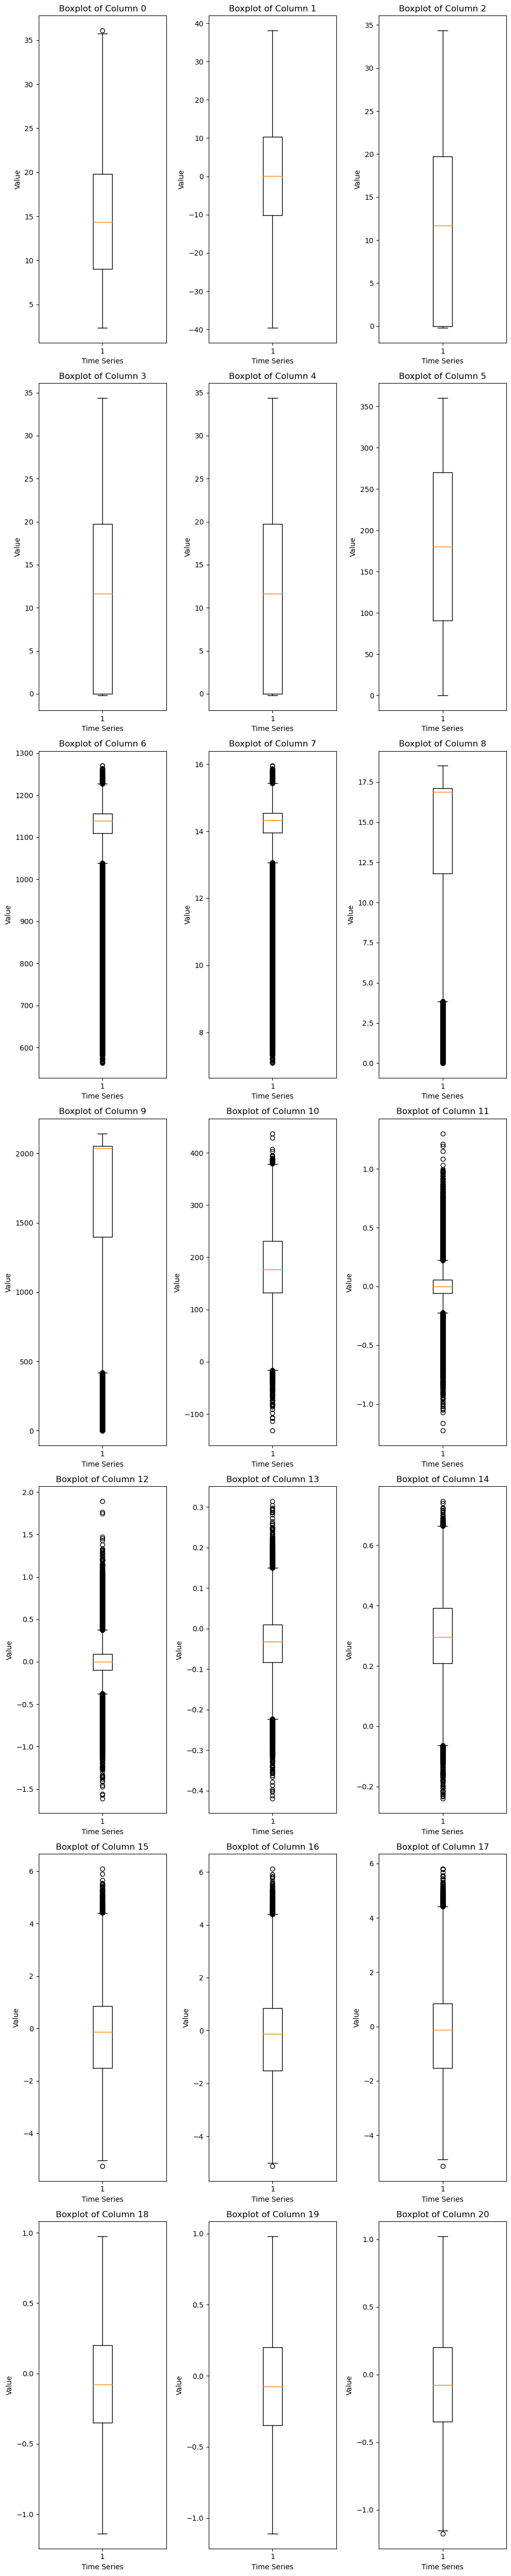

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 50))

for col in range(21):
    plt.subplot(7, 3, col+1)
    plt.boxplot(big_raw_train_df[col])
    plt.xlabel('Time Series')
    plt.ylabel('Value')
    plt.title(f'Boxplot of Column {col}')

plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

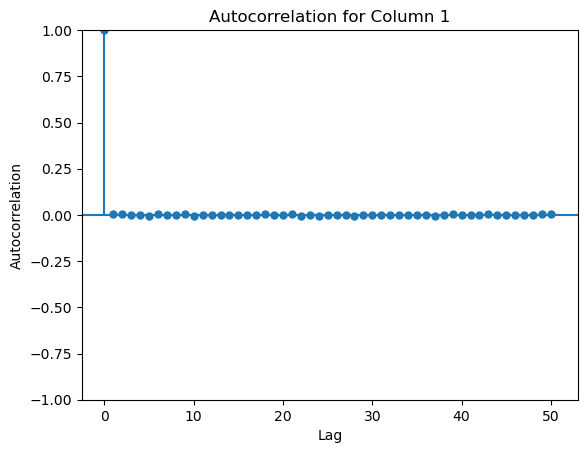

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x400 with 0 Axes>

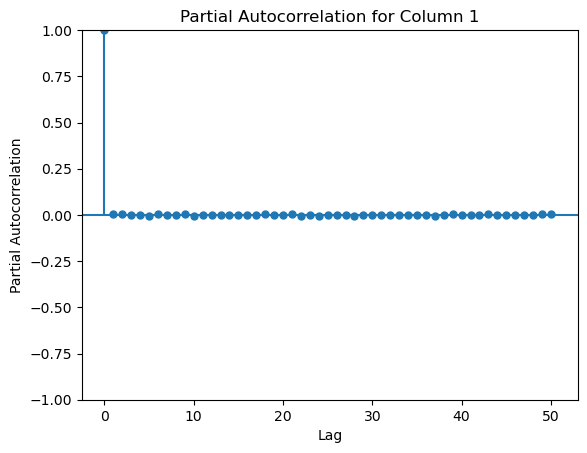

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

column_index = 1  

column_data = big_raw_train_df.iloc[:, column_index]

plt.figure(figsize=(10, 4))
plot_acf(column_data, lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title(f'Autocorrelation for Column {column_index}')
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(column_data, lags=50)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title(f'Partial Autocorrelation for Column {column_index}')
plt.show()


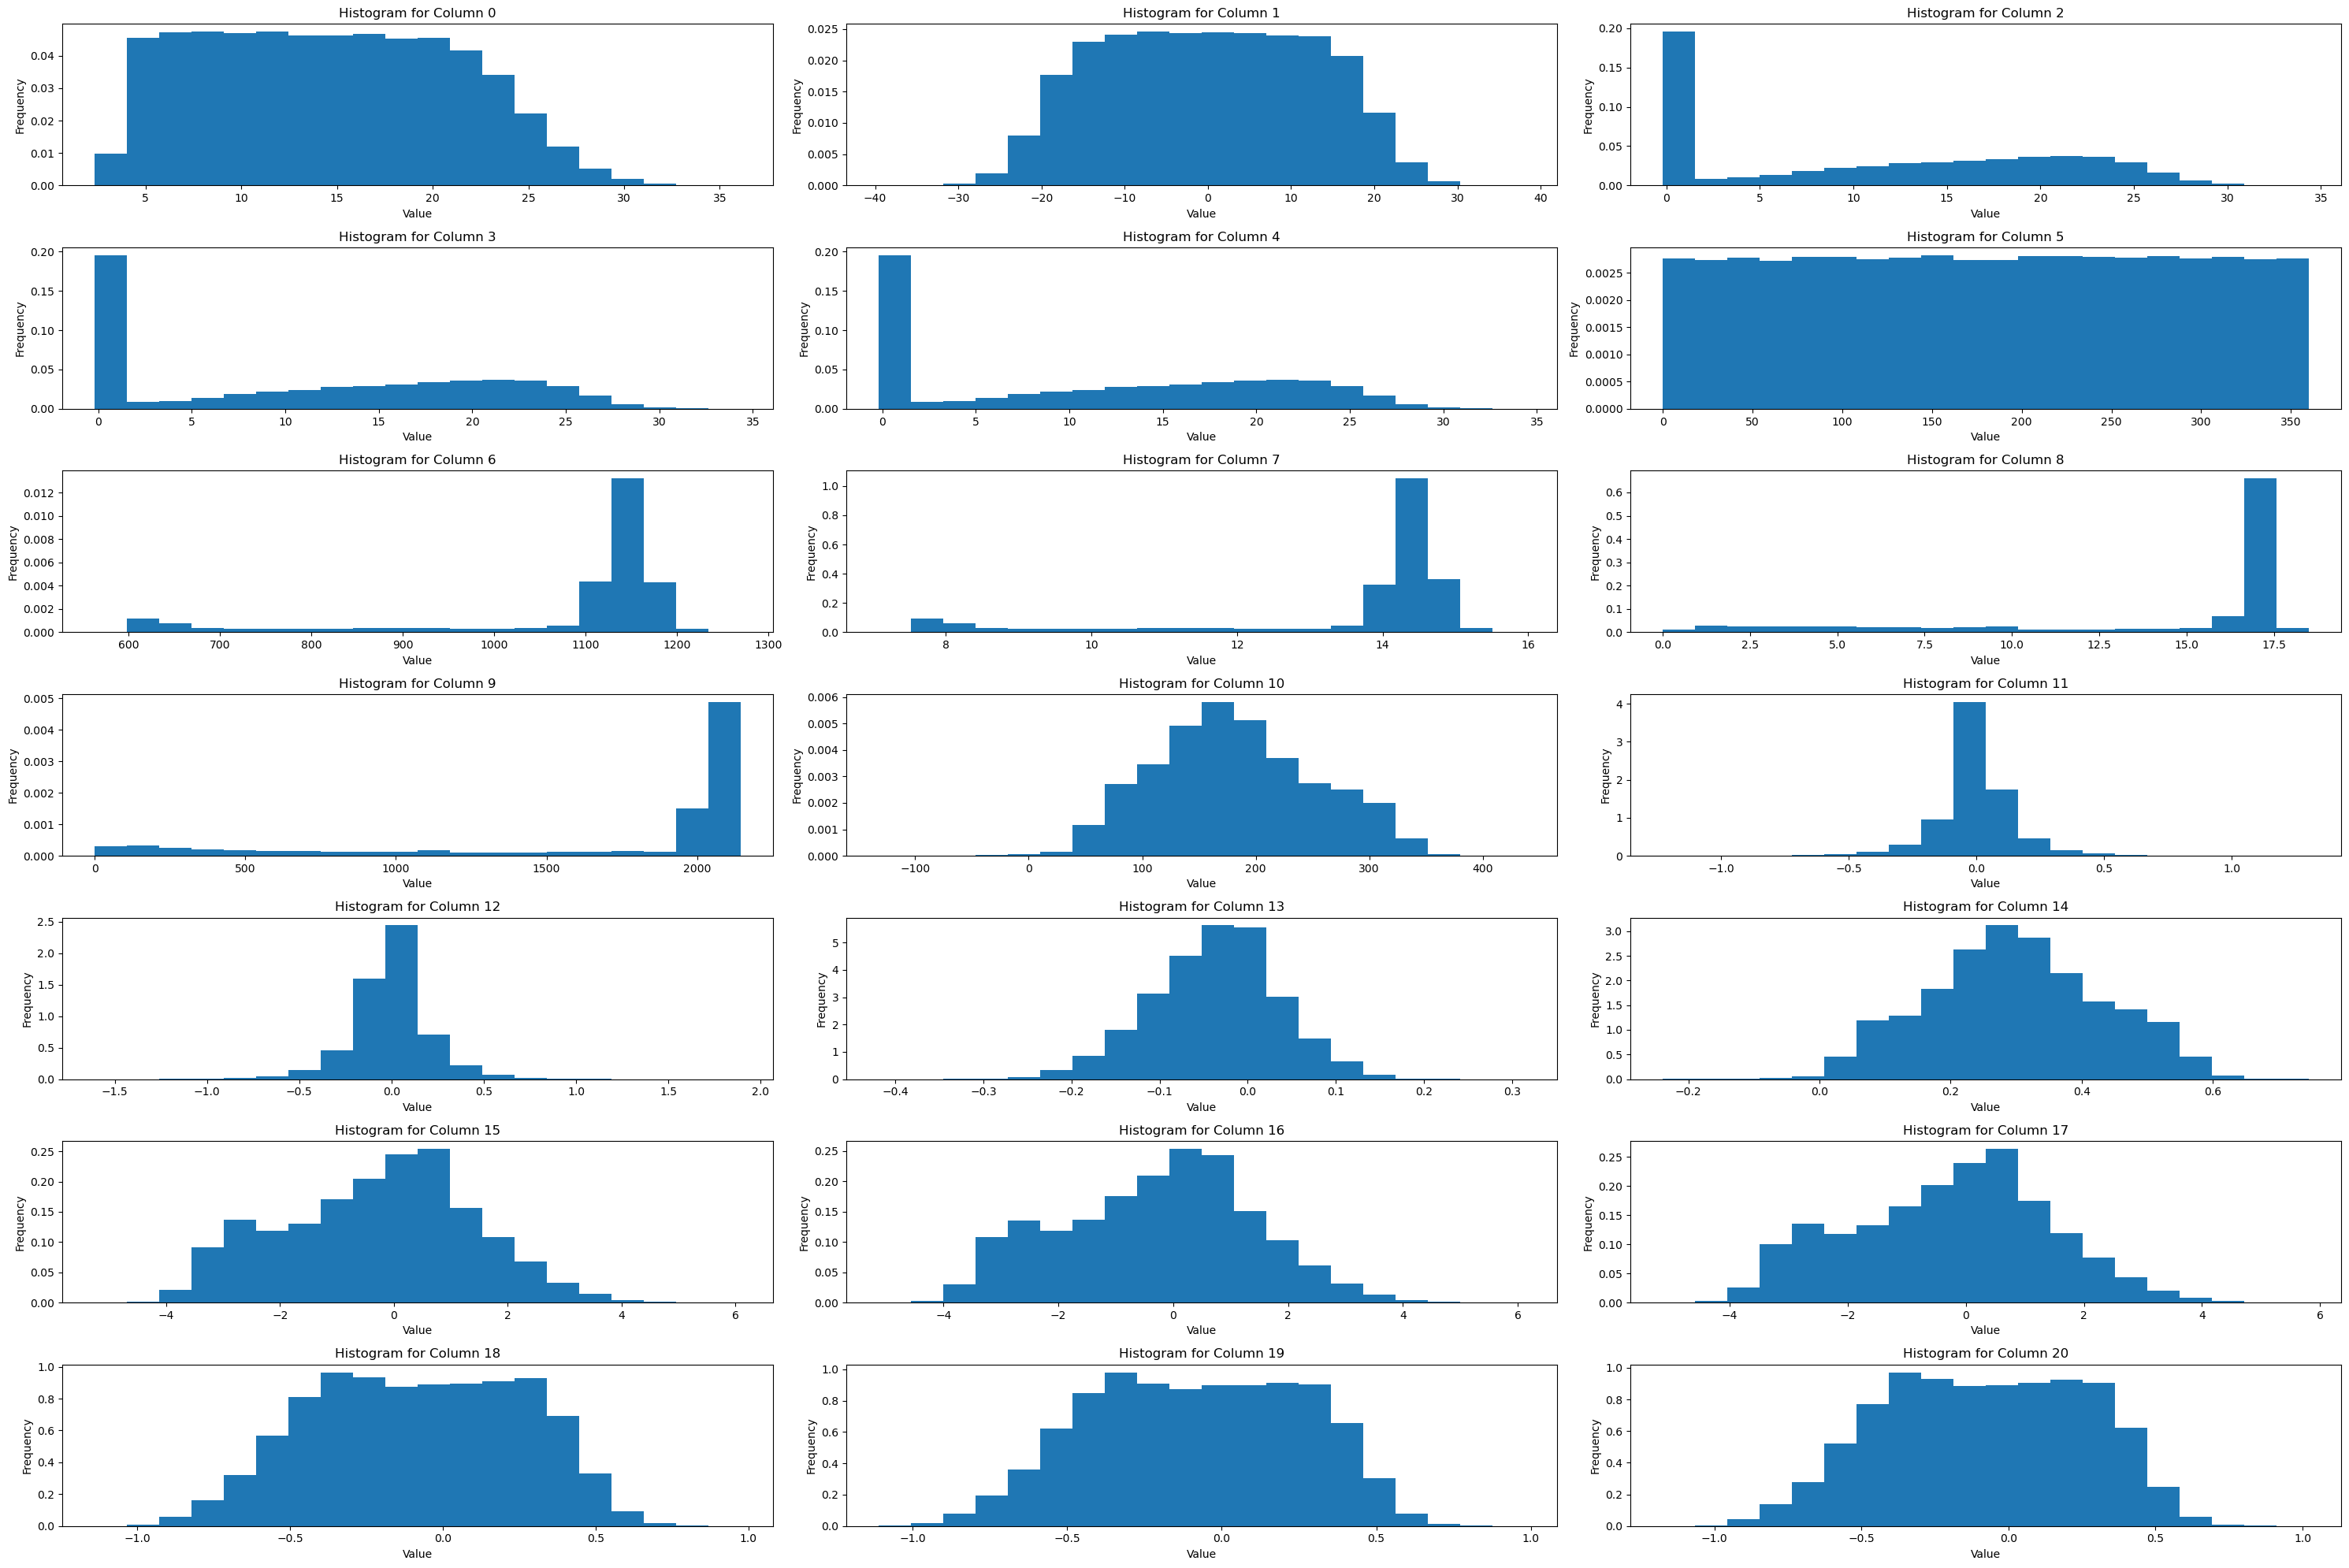

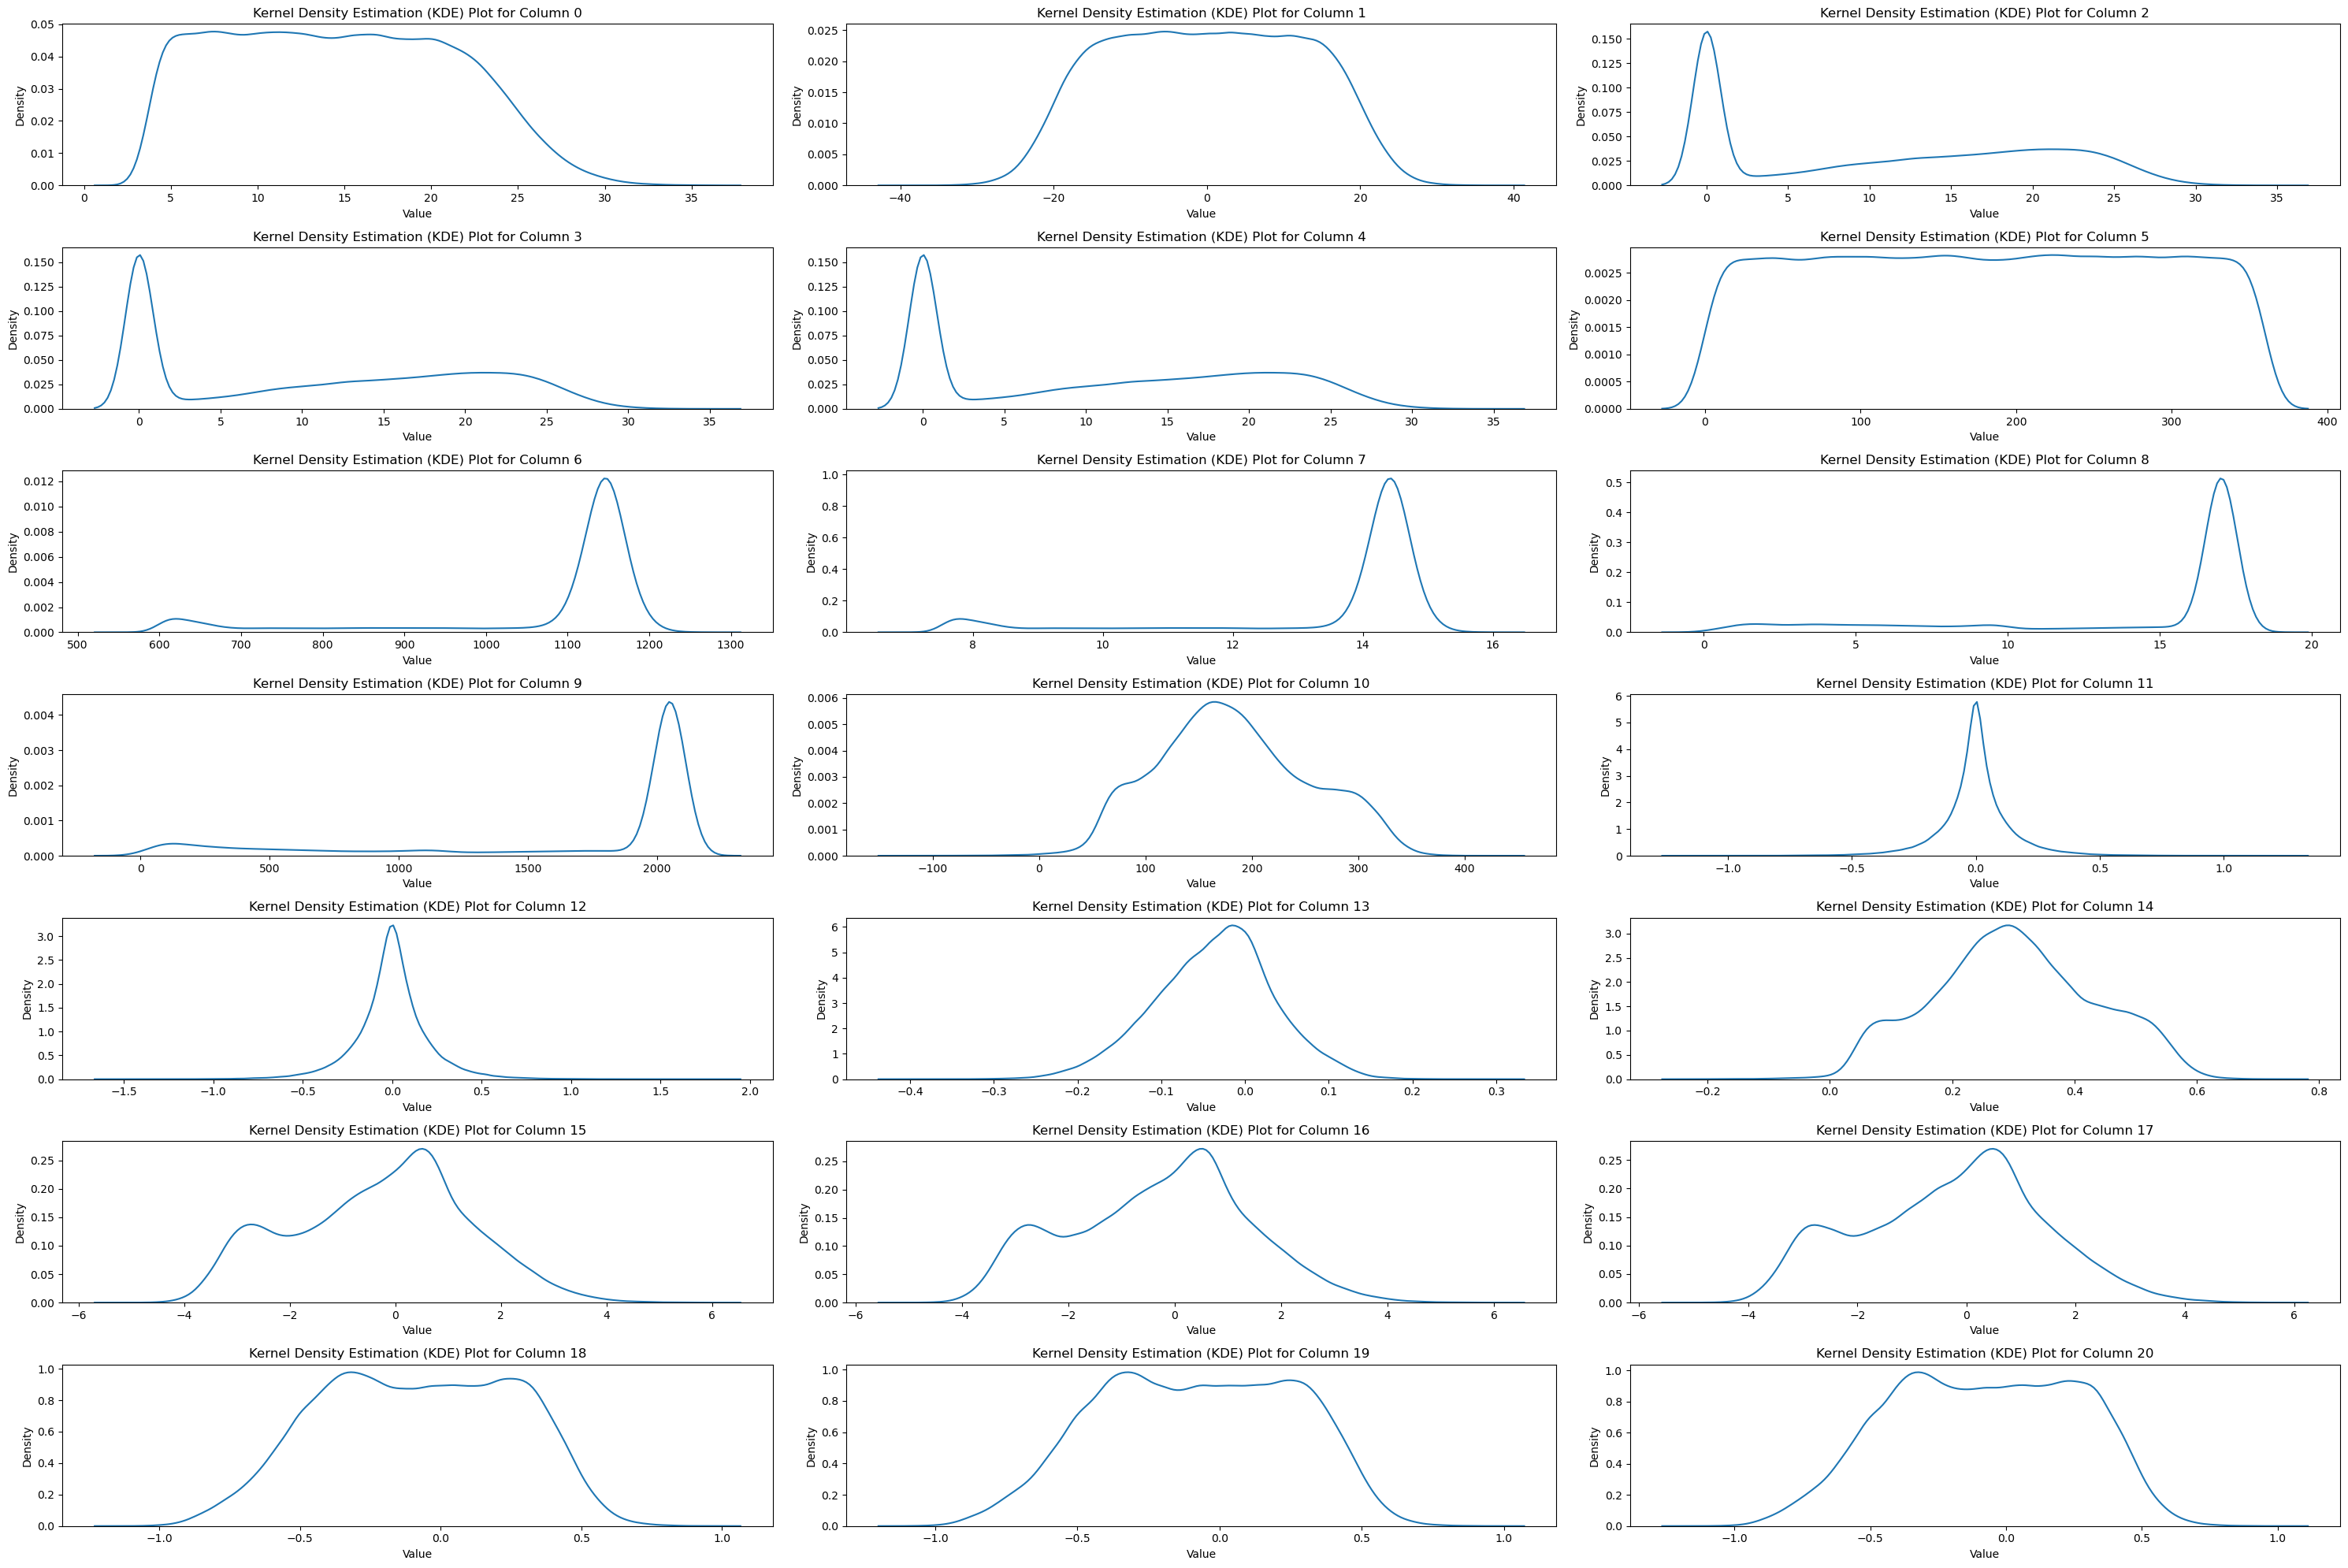

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 20))

for col in range(21):
    column_data = big_raw_train_df.iloc[:, col]
    
    plt.subplot(7, 3, col+1)
    plt.hist(column_data, bins=20, density=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for Column {col}')
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 20))

for col in range(21):
    column_data = big_raw_train_df.iloc[:, col]
    
    plt.subplot(7, 3, col+1)
    sns.kdeplot(column_data)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation (KDE) Plot for Column {col}')
    
plt.tight_layout()
plt.show()


In [7]:
import klib


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (21), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<Axes: xlabel='19', ylabel='Density'>

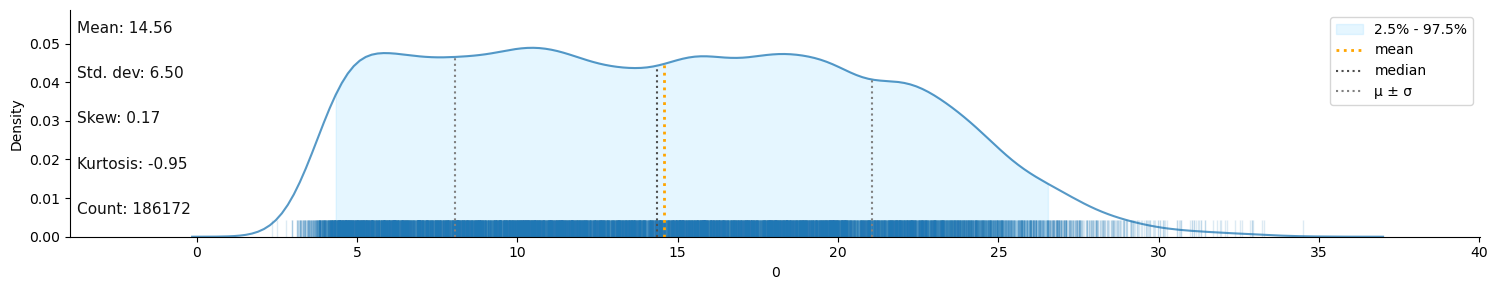

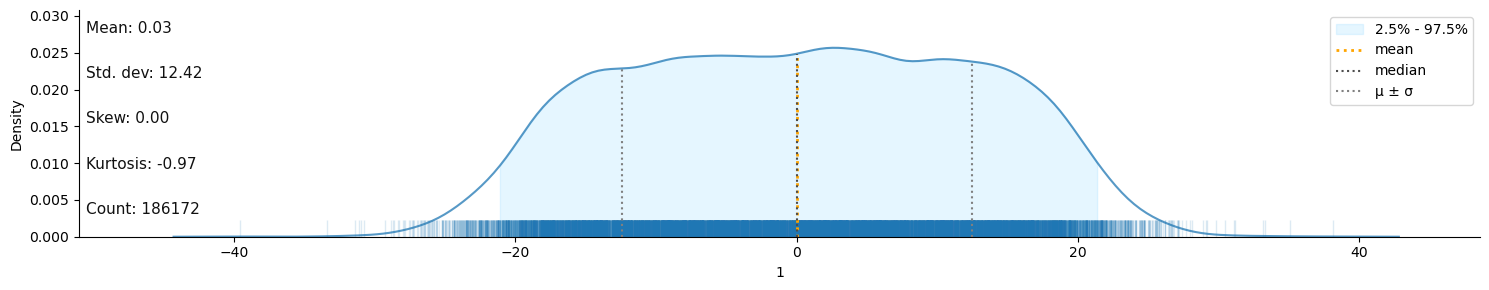

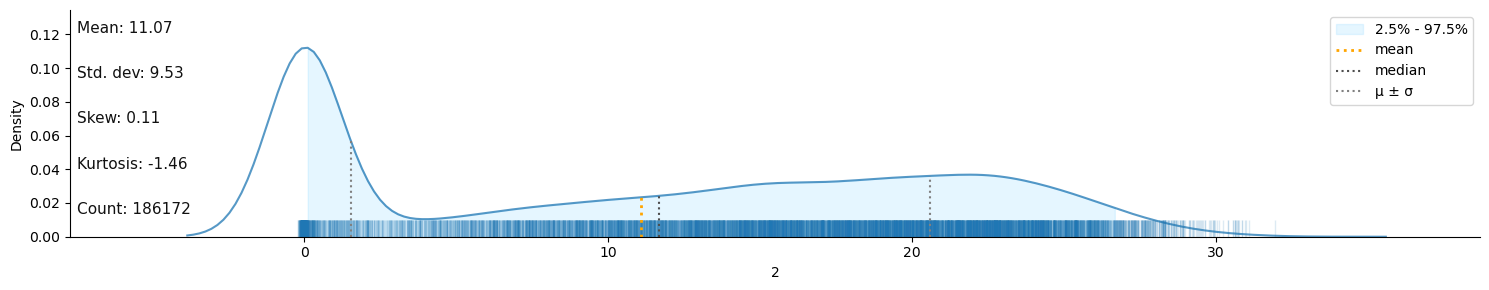

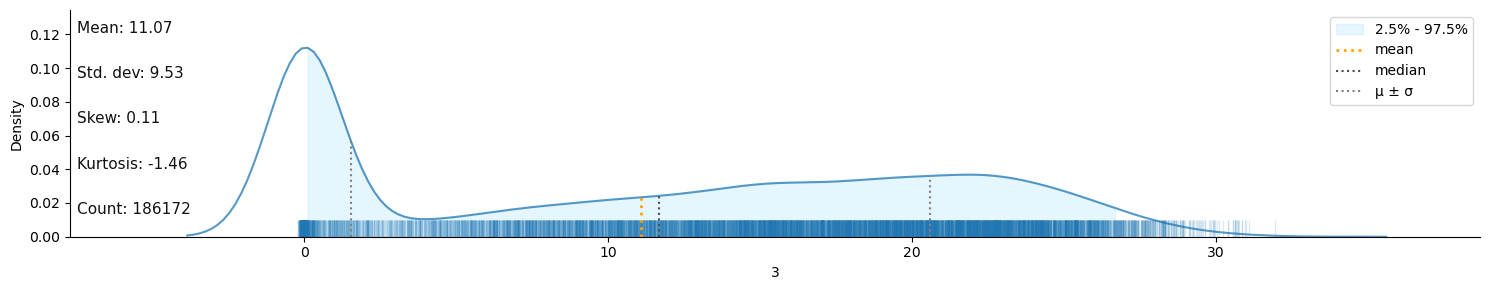

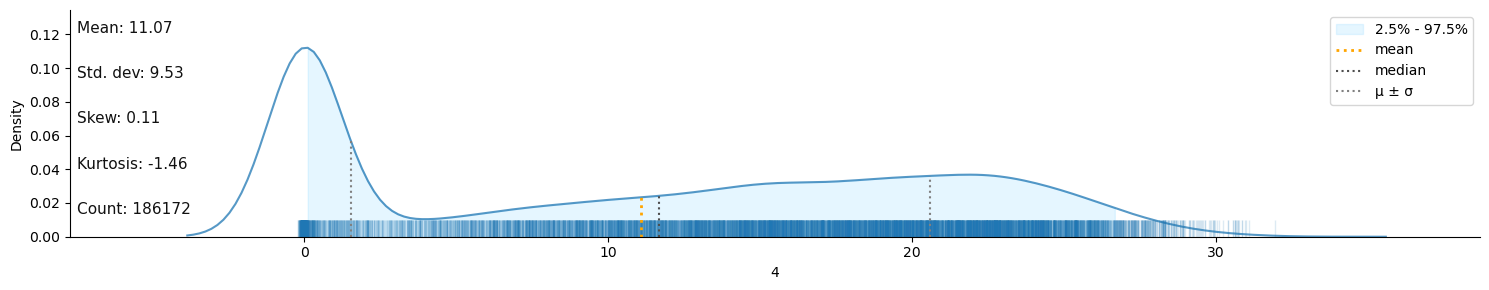

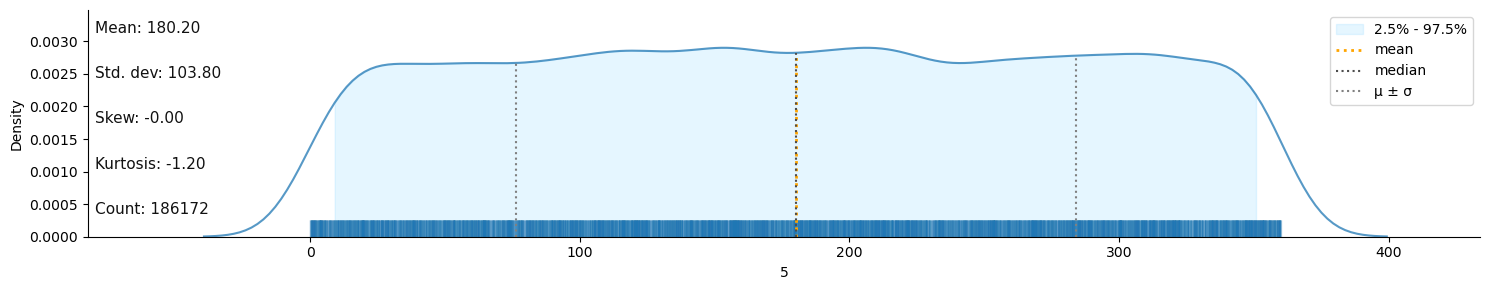

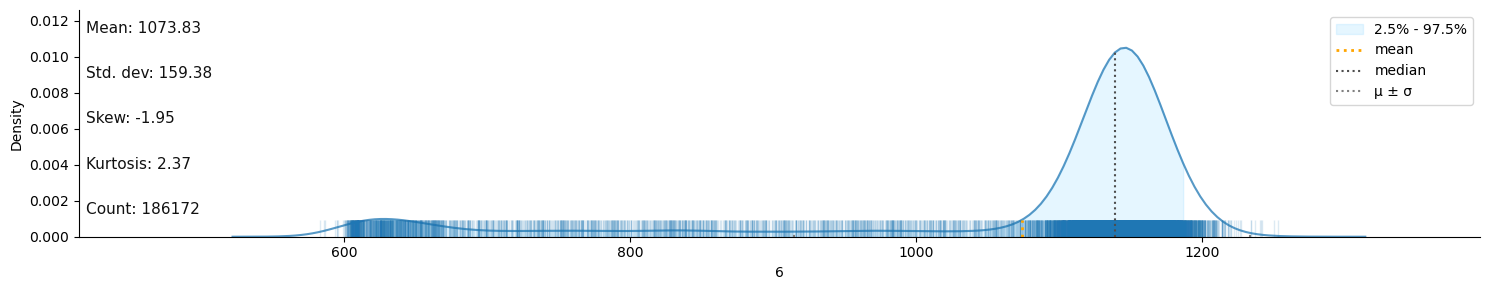

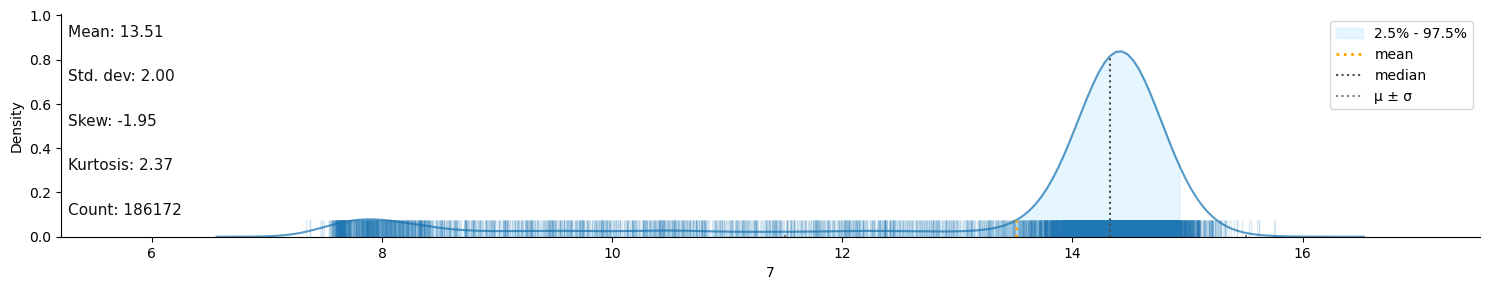

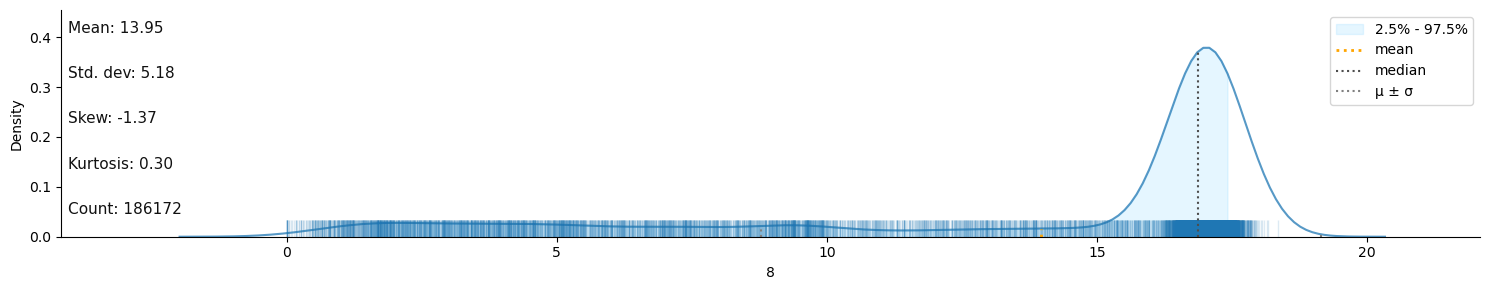

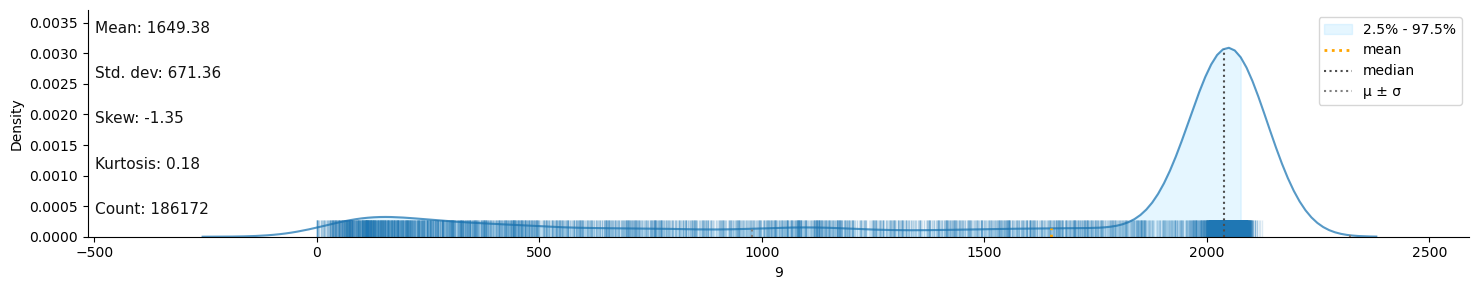

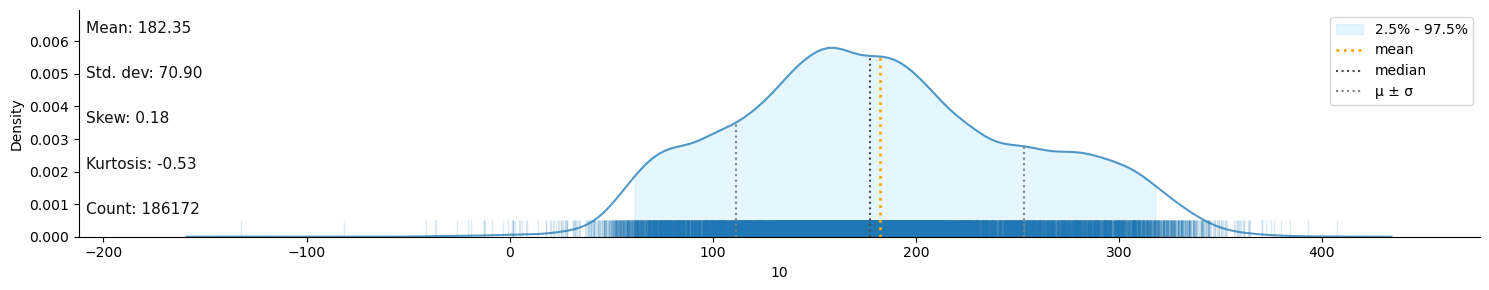

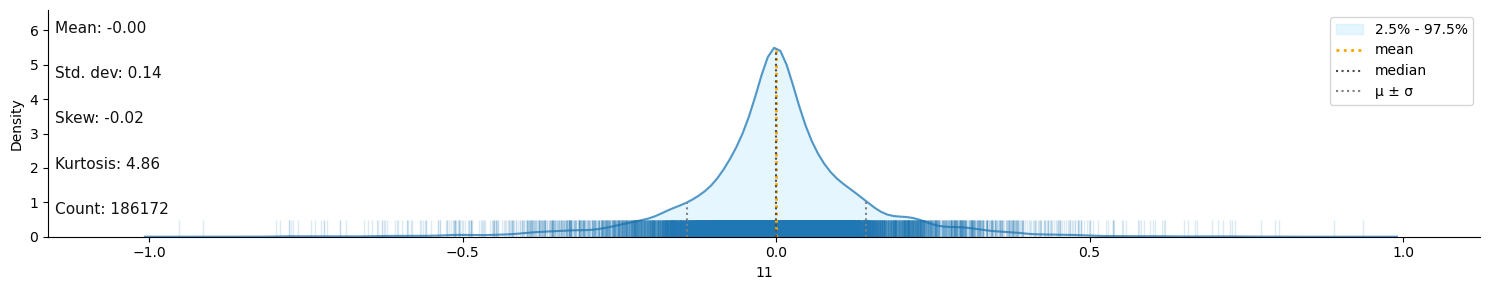

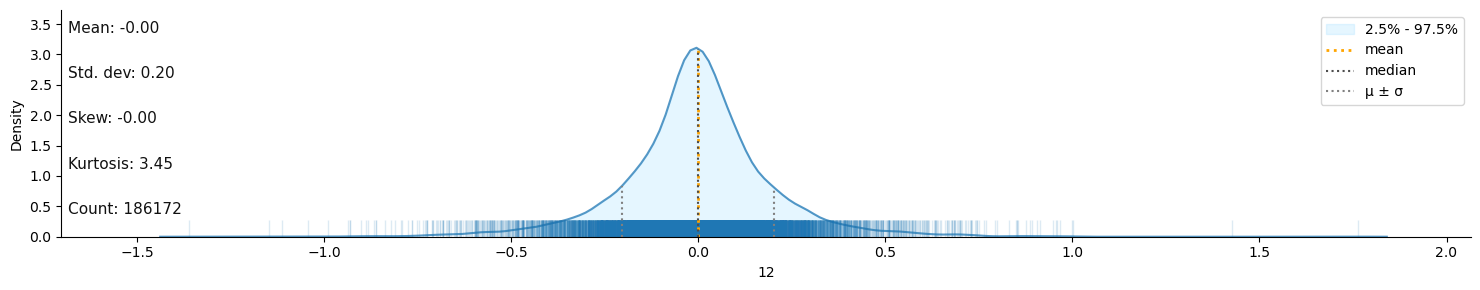

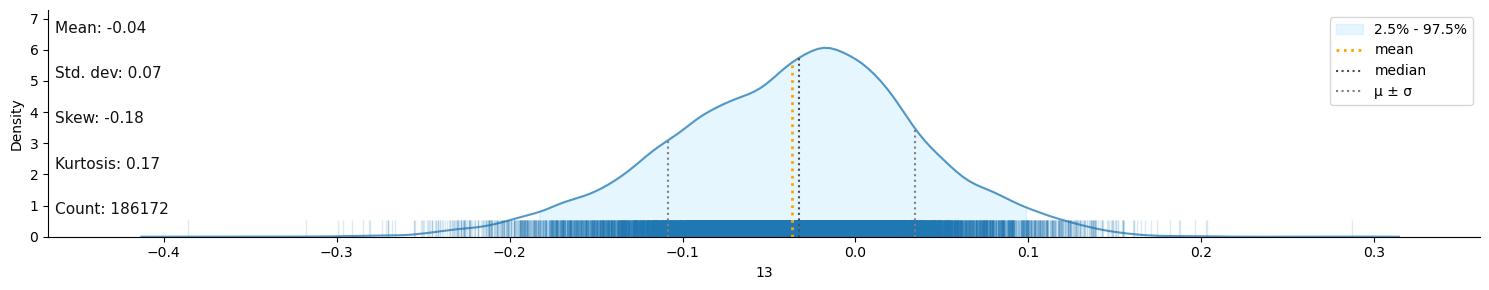

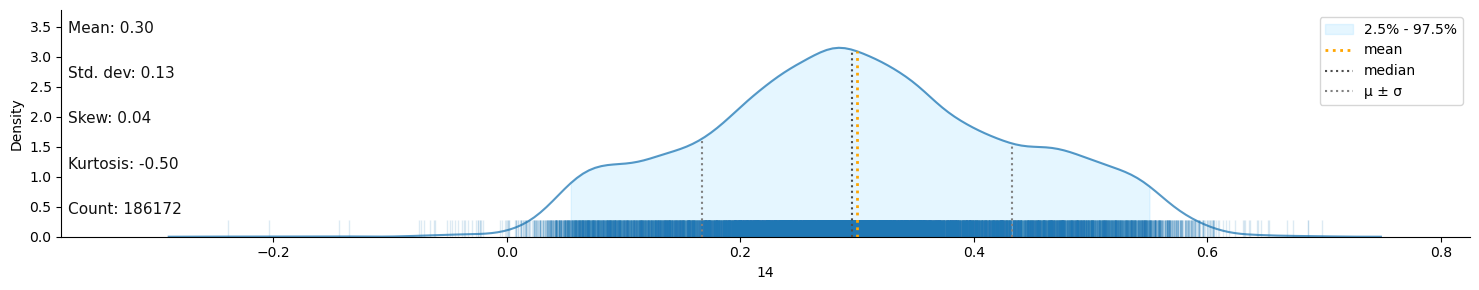

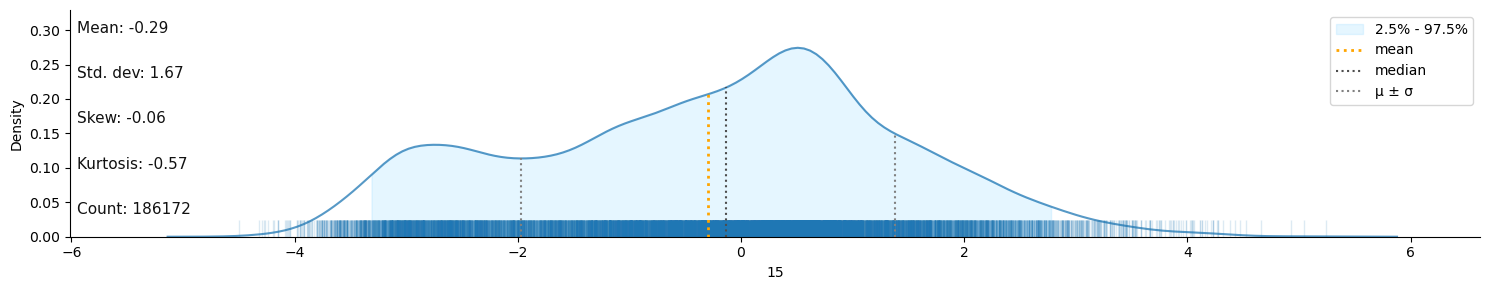

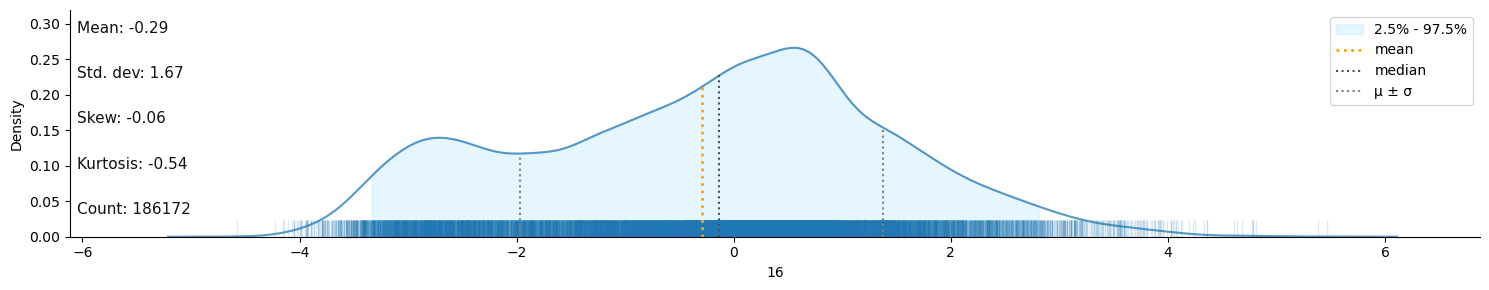

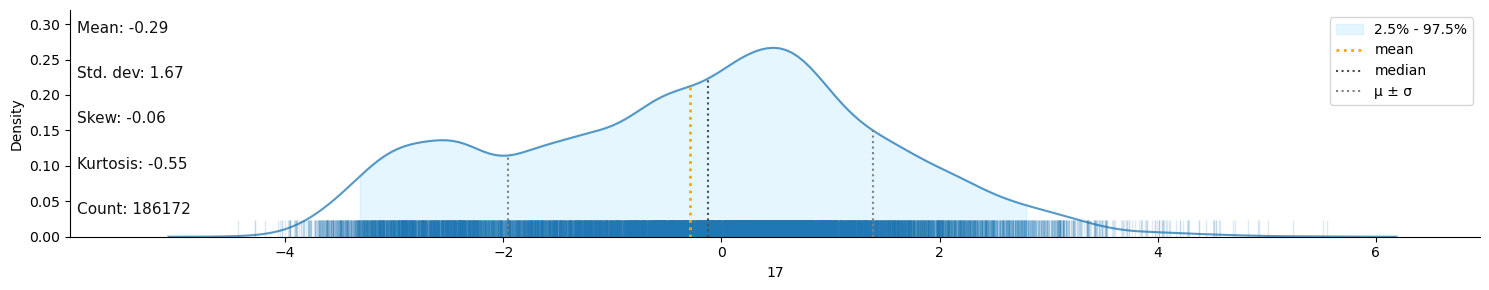

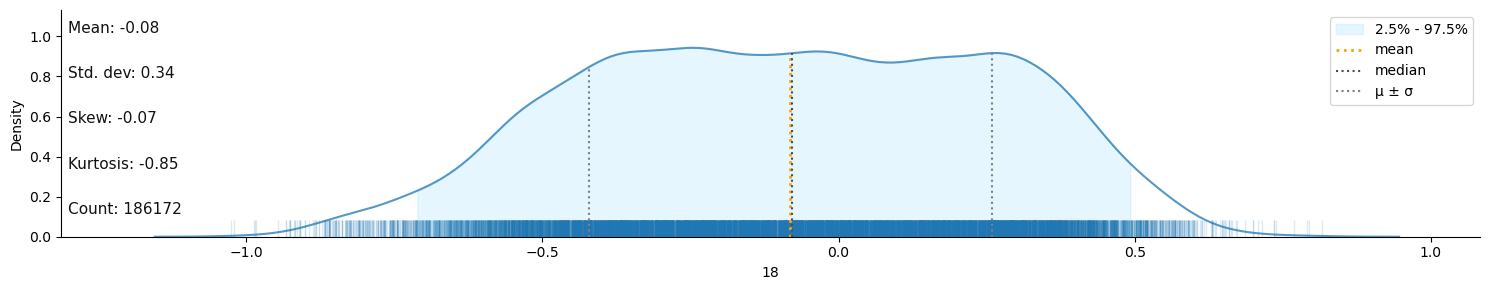

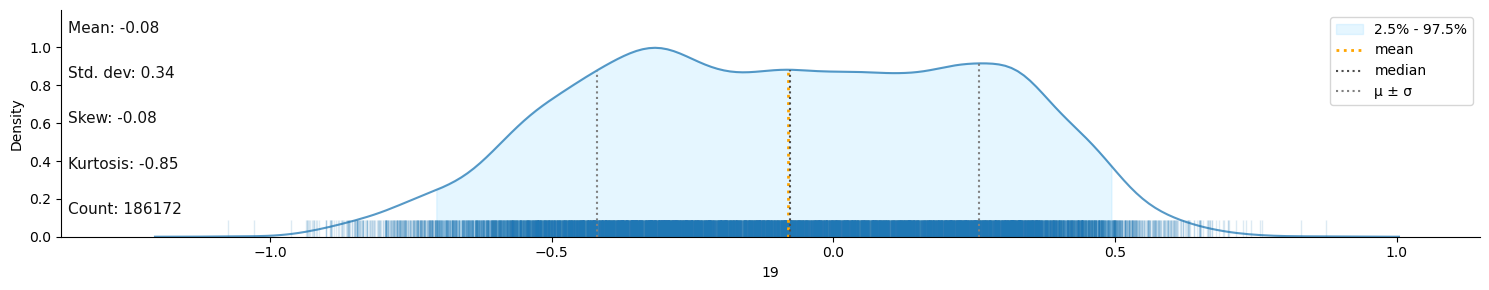

In [8]:
klib.dist_plot(big_raw_train_df)  